## Import Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import cv2 
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Prepare Data

In [4]:
DATADIR = 'Desktop\\PetImages'
CATEGORIES = ['Dog', 'Cat']

In [ ]:
train_data = []
IMG_SIZE = 50

for category in CATEGORIES :
    class_ = CATEGORIES.index(category)
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path) :
        try :
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # because colors will not have a big diff to distinguish dog from cat
            res_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            train_data.append([res_img, class_])
        except :
            pass

In [ ]:
np.random.shuffle(train_data)

In [ ]:
x = []
y = []

for feature, label in train_data :
    x.append(feature)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
# let's save the data if we want to use it later
file = open('x.pkl', 'wb')
pickle.dump(x, file)
file.close()

file = open('y.pkl', 'wb')
pickle.dump(y, file)
file.close()

In [6]:
# normalize data
x = x / 255.0
y = np.array(y)

## Training and Evaluation

In [7]:
# create the model architecture
model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(100, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(50,  activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(
             loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [9]:
# train the model
hist = model.fit(x, y,
                batch_size = 50,
                epochs = 6,
                validation_split = 0.2)

Epoch 1/6
400/400 [==============================] - 1152s 3s/step - loss: 0.6494 - accuracy: 0.6091 - val_loss: 0.6270 - val_accuracy: 0.6485
Epoch 2/6
400/400 [==============================] - 740s 2s/step - loss: 0.5553 - accuracy: 0.7160 - val_loss: 0.5194 - val_accuracy: 0.7417
Epoch 3/6
400/400 [==============================] - 1021s 3s/step - loss: 0.5032 - accuracy: 0.7566 - val_loss: 0.5366 - val_accuracy: 0.7273
Epoch 4/6
400/400 [==============================] - 786s 2s/step - loss: 0.4777 - accuracy: 0.7693 - val_loss: 0.5008 - val_accuracy: 0.7533
Epoch 5/6
400/400 [==============================] - 758s 2s/step - loss: 0.4541 - accuracy: 0.7878 - val_loss: 0.4468 - val_accuracy: 0.7898
Epoch 6/6
400/400 [==============================] - 749s 2s/step - loss: 0.4265 - accuracy: 0.8016 - val_loss: 0.4311 - val_accuracy: 0.7966


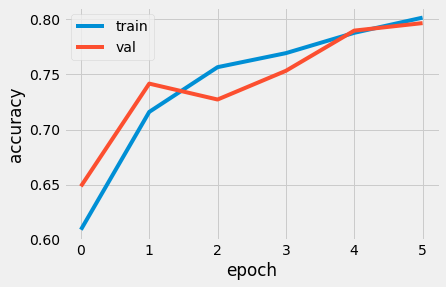

In [10]:
# visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()  

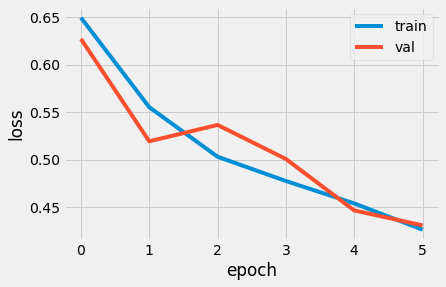

In [11]:
# visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.show()

## Testing

In [12]:
def prepare(path) :
    IMG_SIZE = 50
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    res_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return res_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


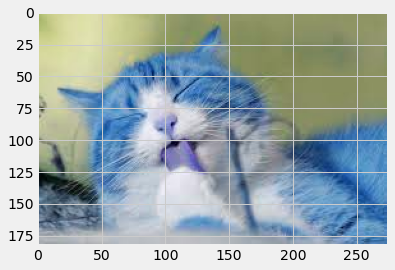

In [46]:
img = cv2.imread('cat2.jpg')
plt.imshow(img)

In [18]:
pred = model.predict([prepare('cat2.jpg')])
CATEGORIES[int(pred[0][0])]

'Cat'

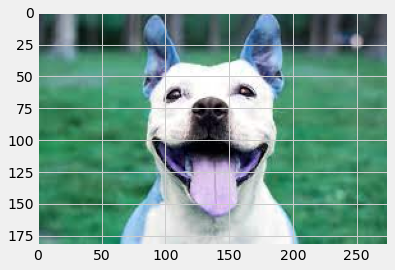

In [47]:
img = cv2.imread('dog2.jpg')
plt.imshow(img)

In [38]:
pred = model.predict([prepare('dog2.jpg')])
pred
CATEGORIES[int(pred[0][0])]

'Dog'